# CEE 498: Transportation Economics
## Assignment Four
### Noah Garfinkle (garfink2@illinois edu)
### 11 March 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
μ=0.5
α=10.0
β=0.5
t_f = 2.0
z_0 = 1.0
γ = 6.0

In [2]:
def Q(z,α=α,β=β):
    q = α - β * z
    return q

In [4]:
def Z(q,z_0=z_0,μ=μ,t_f=t_f,γ=γ):
    z = z_0 + μ * t_f * (1+np.power(q/γ,4))
    return z

In [5]:
def Qinverse(Q,α=α,β=β):
    z = (α-Q)/β
    return z

In [7]:
Qs = np.linspace(0,10,100)
Ps = [Z(q) for q in Qs]
Ds = [Qinverse(q) for q in Qs]

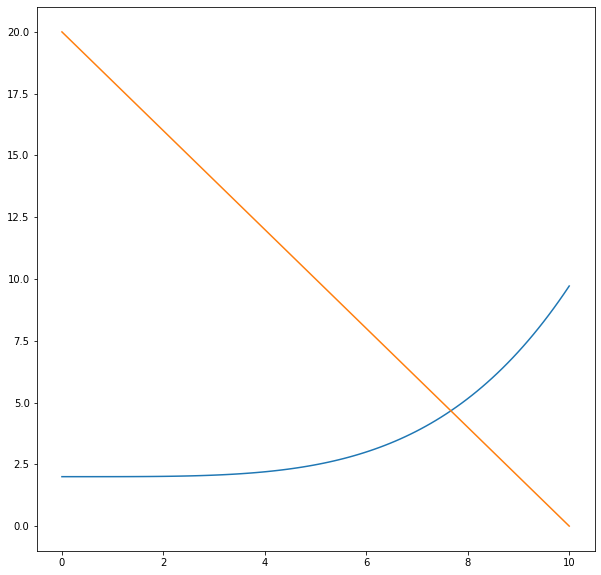

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand")